In [1]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv(r'C:\Users\diyag\Desktop\projects\python_practice\Data Science\project\seattle-weather.csv',header=None)


In [16]:
df.describe()

,0,1,2,3,4,5
count,1462,1462,1462,1462,1462,1462
unique,1462,112,68,56,80,6
top,date,0.0,11.1,6.1,2.6,rain
freq,1,838,58,66,76,641


In [34]:
missing_values = df.isnull().sum()
print(missing_values)

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64


In [1]:
min_val = df.min(numeric_only=True)
print("Minimum values for numeric columns:\n", min_val)

SyntaxError: invalid non-printable character U+00A0 (640793421.py, line 2)

In [19]:
def randomly_replace_values(df, replace_fraction=0.2):
    """
    Randomly replace a fraction of values in each column with NaN.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame.
        replace_fraction (float): Fraction of values to replace with NaN in each column.

    Returns:
        pd.DataFrame: DataFrame with random values replaced by NaN.
    """
    # Iterate over each column
    for col in df.columns:
        # Determine how many values to replace with NaN
        num_to_replace = int(replace_fraction * len(df))
        
        # Randomly select indices to replace in the current column
        indices = np.random.choice(df.index, num_to_replace, replace=False)
        
        # Set the selected indices to NaN
        df.loc[indices, col] = np.nan
    
    return df

# Apply the function
df_with_random_nans = randomly_replace_values(df, replace_fraction=0.3)
print(df_with_random_nans)

               0              1         2         3    4        5
0            NaN  precipitation  temp_max  temp_min  NaN  weather
1     2012-01-01            NaN      12.8       5.0  4.7  drizzle
2     2012-01-02            NaN      10.6       2.8  4.5     rain
3     2012-01-03            NaN      11.7       7.2  NaN      NaN
4     2012-01-04           20.3      12.2       NaN  4.7     rain
...          ...            ...       ...       ...  ...      ...
1457  2015-12-27            8.6       NaN       1.7  NaN     rain
1458         NaN            1.5       NaN       1.7  1.3     rain
1459  2015-12-29            0.0       NaN       0.6  NaN      fog
1460  2015-12-30            0.0       NaN      -1.0  3.4      sun
1461  2015-12-31            0.0       5.6       NaN  3.5      NaN

[1462 rows x 6 columns]


In [20]:
contains_nan = df.isnull().values.any()
print(contains_nan)

True


In [27]:
# df = df.fillna('')
# print(df) 

In [39]:

# Get the minimum value of each column
min_values = df.min()

# Print the minimum values
print("Minimum values for each column:")
print(min_values)

# Replace NaN values in each column with the minimum value of that column
df_filled = df.fillna(min_values)

# Save the new dataset to a CSV file
# Replace 'new_data.csv' with your desired output file name
df_filled.to_csv('new_data_min.csv', index=False)

print("A new dataset with NaN values filled has been created as 'new_data_min.csv'.")



df2 = pd.read_csv(r'C:\Users\diyag\Desktop\projects\python_practice\Data Science\project\new_data_min.csv')
df2.describe()

Minimum values for each column:
0    
1    
2    
3    
4    
5    
dtype: object
A new dataset with NaN values filled has been created as 'new_data_min.csv'.


,4
count,1024.000000
mean,3.227441
std,1.451186
min,0.500000
25%,2.200000
50%,2.900000
75%,4.000000
max,9.500000


In [41]:


# Get the minimum value of each column
max_values = df.max()

# Print the minimum values
print("Maxmium values for each column:")
print(max_values)

# Replace NaN values in each column with the minimum value of that column
df_filled = df.fillna(max_values)

# Save the new dataset to a CSV file
# Replace 'new_data.csv' with your desired output file name
df_filled.to_csv('new_data_max.csv', index=False)

print("A new dataset with NaN values filled has been created as 'new_data_max.csv'.")



df2 = pd.read_csv(r'C:\Users\diyag\Desktop\projects\python_practice\Data Science\project\new_data_max.csv')
df2.describe()

Maxmium values for each column:
0       2015-12-31
1    precipitation
2         temp_max
3         temp_min
4              9.5
5          weather
dtype: object
A new dataset with NaN values filled has been created as 'new_data_max.csv'.


,4
count,1024.000000
mean,3.227441
std,1.451186
min,0.500000
25%,2.200000
50%,2.900000
75%,4.000000
max,9.500000


In [5]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Sample data (given row)
data = {
    'date': ['2012-01-01'],
    'precipitation': [0.0],
    'temp_max': [12.8],
    'temp_min': [5.0],
    'wind': [4.7],
    'weather': ['drizzle']
}

# Creating the DataFrame
weather_data = pd.DataFrame(data)

# Displaying the data
print("Dataset:\n", weather_data)

# Summary statistics
print("\nSummary Statistics:")
print(weather_data.describe())

# Analyzing temperature range
weather_data['temp_range'] = weather_data['temp_max'] - weather_data['temp_min']
print("\nTemperature Range (Max - Min):")
print(weather_data[['date', 'temp_range']])

# Visualizing temperature, wind, and precipitation
plt.figure(figsize=(10, 6))
plt.bar(['Temp Max', 'Temp Min', 'Wind'], 
        [weather_data['temp_max'][0], weather_data['temp_min'][0], weather_data['wind'][0]], 
        color=['red', 'blue', 'green'])
plt.title('Weather Metrics on 2012-01-01')
plt.ylabel('Value')
plt.show()

# Checking the weather description
print("\nWeather Condition:", weather_data['weather'][0])

# Example: Adding polynomial regression for temp_max and temp_min relationship (mock example)
X = np.array(weather_data[['temp_min']])
y = np.array(weather_data['temp_max'])

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# Model prediction
y_pred = model.predict(X_poly)

print("\nPolynomial Regression Prediction for temp_max given temp_min:")
print(f"Actual: {y[0]}, Predicted: {y_pred[0]:.2f}")

# Evaluation metrics for mock regression
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("\nModel Evaluation Metrics:")
print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, R2 Score: {r2:.2f}")


ModuleNotFoundError: No module named 'sklearn'

In [4]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Loading the dataset
file_path = r'C:\Users\diyag\Desktop\projects\python_practice\Data Science\project\seattle-weather.csv'
weather_data = pd.read_csv(file_path)

# Step 1: Computing descriptive statistics
summary_stats = weather_data[['temp_max', 'temp_min', 'precipitation']].agg(
    ['mean', 'median', 'std', 'min', 'max']
).T
summary_stats['range'] = summary_stats['max'] - summary_stats['min']

print("\nSummary Statistics:\n", summary_stats)

# Step 2: Standardizing numerical features
standardized_data = weather_data.copy()
numerical_cols = ['temp_max', 'temp_min', 'precipitation', 'wind']

standardized_data[numerical_cols] = (
    weather_data[numerical_cols] - weather_data[numerical_cols].mean()
) / weather_data[numerical_cols].std()

print("\nStandardized Data (First 5 Rows):\n", standardized_data.head())

# Step 3: Visualizing standardized features
plt.figure(figsize=(12, 6))
standardized_data[numerical_cols].boxplot()
plt.title('Standardized Numerical Features')
plt.ylabel('Standardized Value')
plt.show()

# Step 4: Polynomial Regression Example (temp_min -> temp_max)
X = standardized_data[['temp_min']].values
y = standardized_data['temp_max'].values

# Adding polynomial features
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

# Training the model
model = LinearRegression()
model.fit(X_poly, y)

# Making predictions
y_pred = model.predict(X_poly)

# Displaying actual vs predicted values
print("\nPolynomial Regression Prediction for temp_max given temp_min (Standardized):")
print(f"Actual: {y[0]:.2f}, Predicted: {y_pred[0]:.2f}")

# Model evaluation metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("\nModel Evaluation Metrics:")
print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, R2 Score: {r2:.2f}")


ModuleNotFoundError: No module named 'sklearn'


Summary Statistics:
                     mean  median       std  min   max  range
temp_max       16.439083    15.6  7.349758 -1.6  35.6   37.2
temp_min        8.234771     8.3  5.023004 -7.1  18.3   25.4
precipitation   3.029432     0.0  6.680194  0.0  55.9   55.9

Standardized Data (First 5 Rows):
          date  precipitation  temp_max  temp_min      wind  weather
0  2012-01-01      -0.453495 -0.495130 -0.643991  1.014632  drizzle
1  2012-01-02       1.178194 -0.794459 -1.081976  0.875533     rain
2  2012-01-03      -0.333738 -0.644794 -0.206006 -0.654555     rain
3  2012-01-04       2.585339 -0.576765 -0.524541  1.014632     rain
4  2012-01-05      -0.258889 -1.025759 -1.081976  1.988325     rain


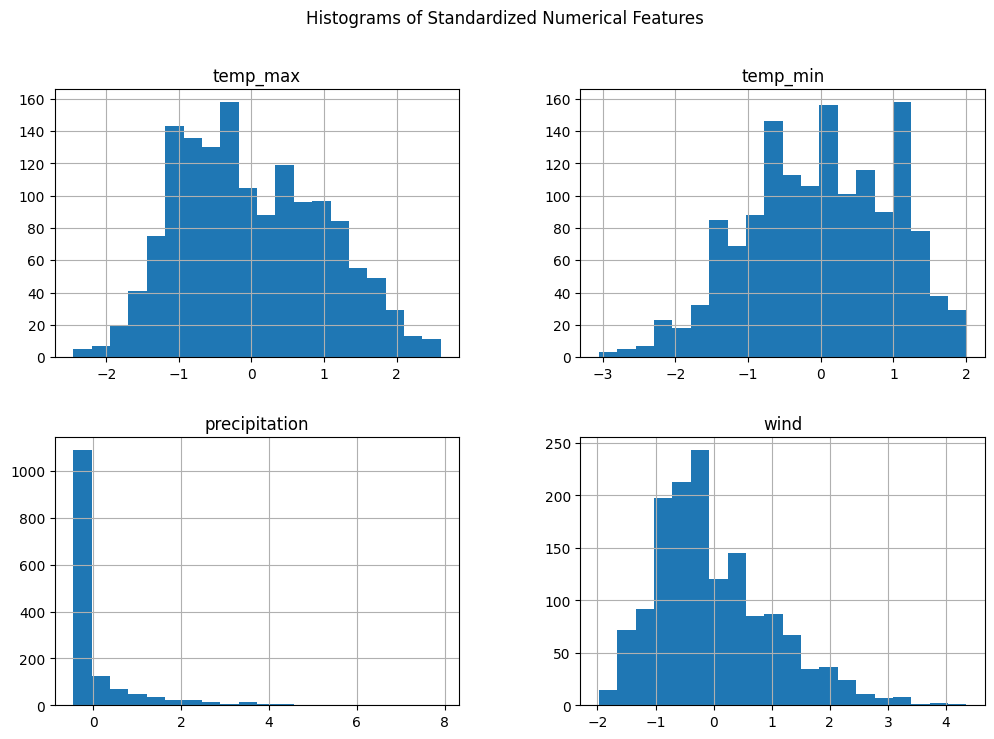


Polynomial Regression Prediction for temp_max given temp_min (Standardized):
Actual: -0.50, Predicted: -0.64

Model Evaluation Metrics:
MAE: 0.38, MSE: 0.22, R2 Score: 0.78


In [8]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Loading the dataset
file_path = r'C:\Users\diyag\Desktop\projects\python_practice\Data Science\project\seattle-weather.csv'
weather_data = pd.read_csv(file_path)

# Computing descriptive statistics
summary_stats = weather_data[['temp_max', 'temp_min', 'precipitation']].agg(
    ['mean', 'median', 'std', 'min', 'max']
).T
summary_stats['range'] = summary_stats['max'] - summary_stats['min']

print("\nSummary Statistics:\n", summary_stats)

# Standardizing numerical features
standardized_data = weather_data.copy()
numerical_cols = ['temp_max', 'temp_min', 'precipitation', 'wind']

standardized_data[numerical_cols] = (
    weather_data[numerical_cols] - weather_data[numerical_cols].mean()
) / weather_data[numerical_cols].std()

print("\nStandardized Data (First 5 Rows):\n", standardized_data.head())

#Visualizing standardized features


standardized_data[numerical_cols].hist(figsize=(12, 8), bins=20, layout=(2, 2))
plt.suptitle('Histograms of Standardized Numerical Features')
plt.show()




# Polynomial Regression Example (temp_min -> temp_max)
X = standardized_data[['temp_min']].values
y = standardized_data['temp_max'].values

# Adding polynomial features
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

# Training the model
model = LinearRegression()
model.fit(X_poly, y)

# Making predictions
y_pred = model.predict(X_poly)

# Displaying actual vs predicted values
print("\nPolynomial Regression Prediction for temp_max given temp_min (Standardized):")
print(f"Actual: {y[0]:.2f}, Predicted: {y_pred[0]:.2f}")

# Model evaluation metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("\nModel Evaluation Metrics:")
print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, R2 Score: {r2:.2f}")
